# _Superstore Performance Analysis_

In [81]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv("D:/ANALYTICS/Projects/superstore.csv", encoding='ISO-8859-1')

# Displaying the first few rows of the dataset
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [83]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [84]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [85]:
# Drop rows with missing essential columns
df = df.dropna(subset=['Sales', 'Profit', 'Product Name', 'Order Date', 'Ship Mode', 'Segment', 'Region'])


In [86]:
# Fill missing values in non-essential columns with mode or other appropriate values
df['Product Name'] = df['Product Name'].fillna('Unknown')
df['Ship Mode'] = df['Ship Mode'].fillna('Unknown')
df['Segment'] = df['Segment'].fillna('Unknown')
df['Region'] = df['Region'].fillna('Unknown')

### _Sales performance by Product Category and Sub Category_

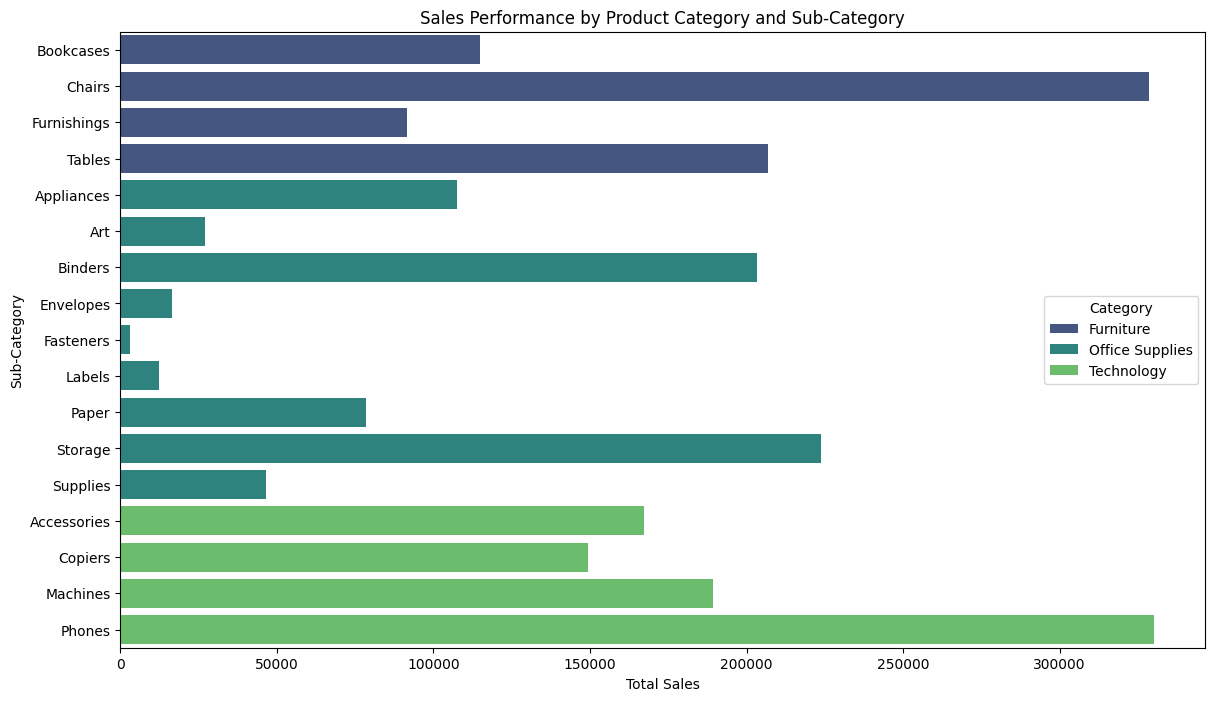

In [87]:
# Aggregate sales by category and sub-category
sales_performance = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Set up the visualization
plt.figure(figsize=(14, 8))
sns.barplot(x='Sales', y='Sub-Category', hue='Category', data=sales_performance, palette='viridis')

# Customize the plot
plt.title('Sales Performance by Product Category and Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.legend(title='Category')
plt.show()

### _Sales and Profit Trend Over Time_

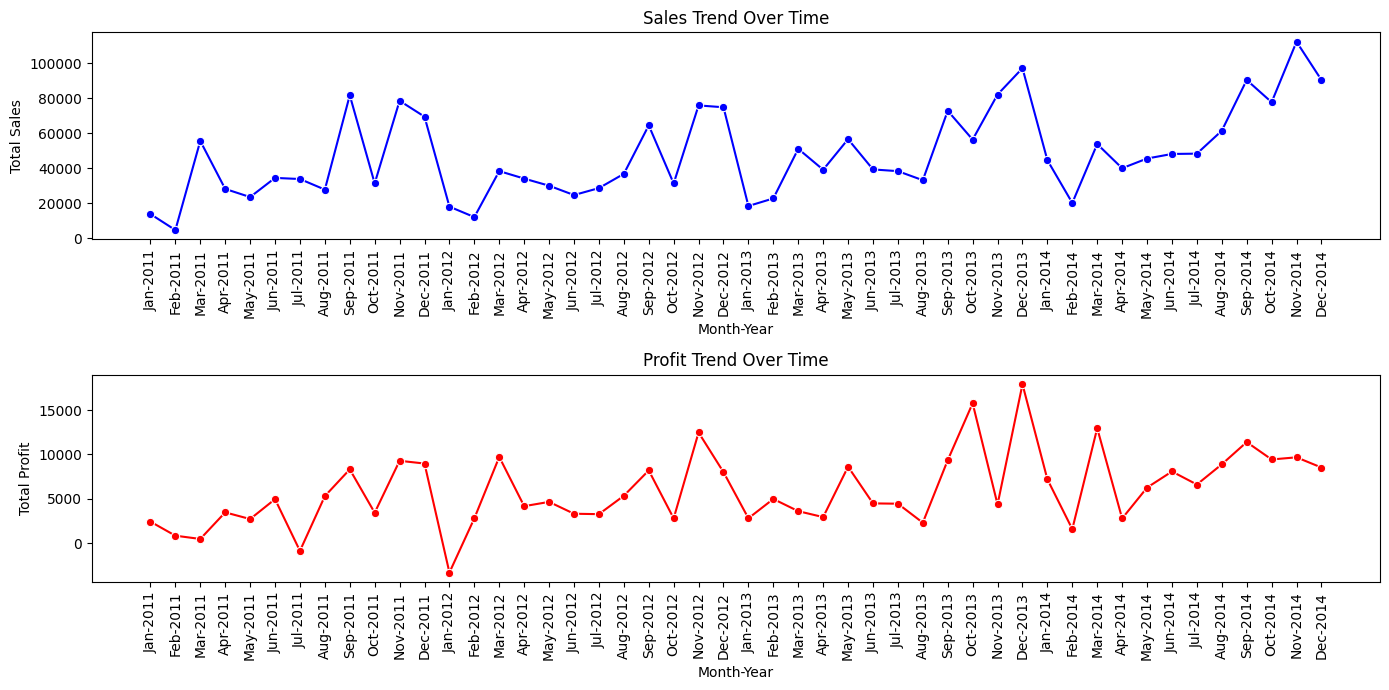

In [88]:


# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

# Extract Month and Year for grouping
df['Month'] = df['Order Date'].dt.strftime('%B')
df['Year'] = df['Order Date'].dt.year

# Create a 'Month-Year' column for sorting and plotting
df['Month-Year'] = df['Order Date'].dt.to_period('M').astype(str)

# Group data by 'Month-Year' and sum up 'Sales' and 'Profit'
trend_data = df.groupby('Month-Year')[['Sales', 'Profit']].sum().reset_index()

# Convert 'Month-Year' back to datetime for proper sorting and plotting
trend_data['Date'] = pd.to_datetime(trend_data['Month-Year'], format='%Y-%m')

# Sort data by date
trend_data = trend_data.sort_values('Date')

# Extract month names and years for x-axis labels
trend_data['Month-Year-Label'] = trend_data['Date'].dt.strftime('%b-%Y')

# Create the plots
plt.figure(figsize=(14, 7))

# Plot sales trend
plt.subplot(2, 1, 1)
sns.lineplot(x='Month-Year-Label', y='Sales', data=trend_data, marker='o', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels

# Plot profit trend
plt.subplot(2, 1, 2)
sns.lineplot(x='Month-Year-Label', y='Profit', data=trend_data, marker='o', color='r')
plt.title('Profit Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()


### _Sales and Profit Across States_

C:\Users\user\AppData\Local\Temp\ipykernel_5116\3591366175.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_5116\3591366175.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




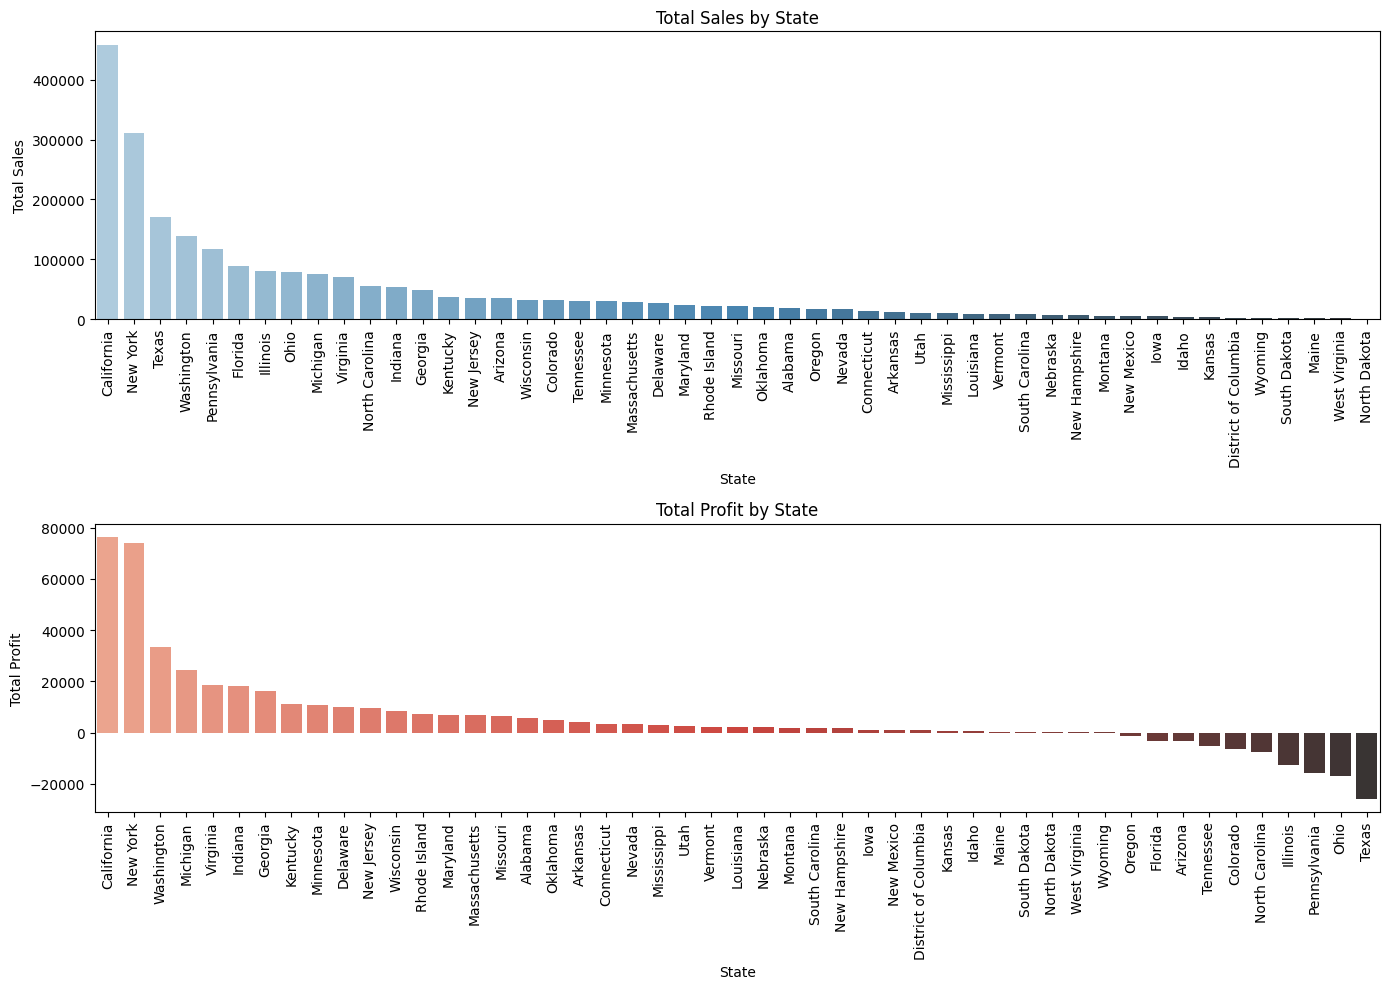

In [89]:
# Group by 'State' and calculate total sales and profit
state_summary = df.groupby('State')[['Sales', 'Profit']].sum().reset_index()

# Set 'State' as the index
state_summary.set_index('State', inplace=True)

# Sort states by total sales and profit
top_states_sales = state_summary[['Sales']].sort_values(by='Sales', ascending=False)
top_states_profit = state_summary[['Profit']].sort_values(by='Profit', ascending=False)

# Create a figure with two subplots
plt.figure(figsize=(14, 10))

# Bar chart for Sales
plt.subplot(2, 1, 1)
sns.barplot(x=top_states_sales.index, y='Sales', data=top_states_sales, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')

# Bar chart for Profit
plt.subplot(2, 1, 2)
sns.barplot(x=top_states_profit.index, y='Profit', data=top_states_profit, palette='Reds_d')
plt.xticks(rotation=90)
plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### _Profit Across Customer Segments_

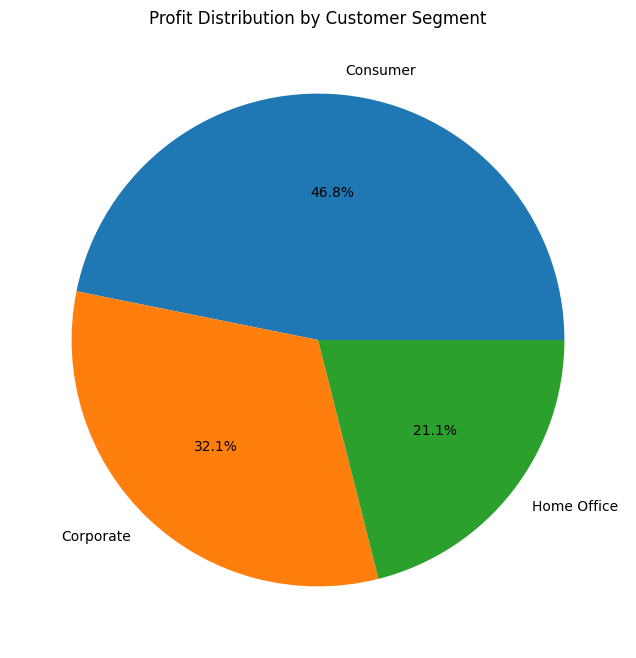

In [90]:
# Aggregate profit by segment
segment_profit = df.groupby('Segment')['Profit'].sum()

# Plot
plt.figure(figsize=(8, 8))
segment_profit.plot(kind='pie', autopct='%1.1f%%')
plt.title('Profit Distribution by Customer Segment')
plt.ylabel('')
plt.show()


### _Commonly Used Shipping Modes_

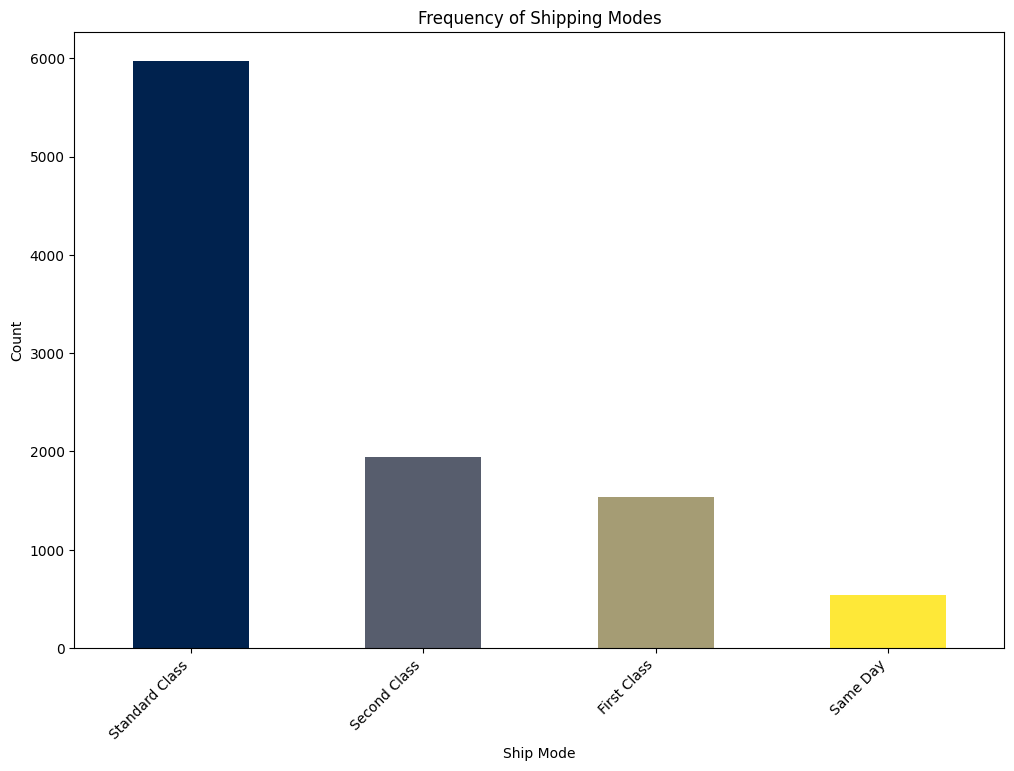

In [91]:
# Count occurrences of each ship mode
ship_mode_counts = df['Ship Mode'].value_counts()

# Generate a color map
colors = plt.cm.cividis(np.linspace(0, 1, len(ship_mode_counts)))

# Plot
plt.figure(figsize=(12, 8))
ship_mode_counts.plot(kind='bar', color=colors)
plt.title('Frequency of Shipping Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### _Sales and Profit Across Regions_

Region with Highest Sales:
Region           West
Sales     725457.8245
Profit    108418.4489
Name: 3, dtype: object
Region with Highest Profit:
Region           West
Sales     725457.8245
Profit    108418.4489
Name: 3, dtype: object


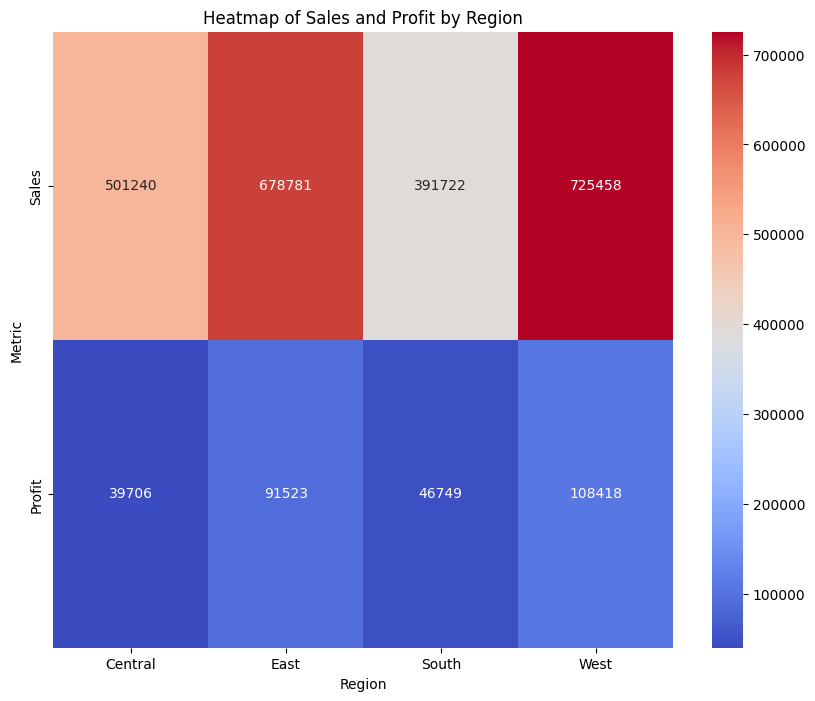

In [92]:
# Aggregate sales and profit by region
region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

# Find the highest sales and profit
highest_sales_region = region_sales_profit.loc[region_sales_profit['Sales'].idxmax()]
highest_profit_region = region_sales_profit.loc[region_sales_profit['Profit'].idxmax()]

print("Region with Highest Sales:")
print(highest_sales_region)

print("Region with Highest Profit:")
print(highest_profit_region)
# Set up the figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sales_profit_matrix = region_sales_profit.set_index('Region').T
sns.heatmap(sales_profit_matrix, annot=True, cmap='coolwarm', fmt='.0f')

plt.title('Heatmap of Sales and Profit by Region')
plt.xlabel('Region')
plt.ylabel('Metric')
plt.show()

